In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import yfinance as yf
from pypfopt import risk_models,EfficientFrontier,expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation,get_latest_prices
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

start_date = dt.datetime(2020,10,10)
end_date = dt.datetime(2024,1,8)

def get_tickers(tickers,start,end):
    
    
    return yf.download(tickers,start=start_date,end=end_date)['Close']




stock_tickers = ['AAPL', 'TGT', 'MCD', 'IBM', 'TSLA']
ETF_tickers = ['BND', 'HYG', 'TIP', 'IEF', 'LQD']
FX_tickers = ['USDJPY=X', 'USDGBP=X', 'USDEUR=X', 'USDAUD=X', 'USDRUB=X']
CRYPTO_tickers = ['BTC-USD', 'ETH-USD', 'SOL-USD', 'ADA-USD', 'XRP-USD']

stocks_df = get_tickers(stock_tickers, start=start_date, end=end_date)
FX_df = get_tickers(FX_tickers, start=start_date, end=end_date)
ETF_df = get_tickers(ETF_tickers, start=start_date, end=end_date)
CRYPTO_df = get_tickers(CRYPTO_tickers, start=start_date, end=end_date)

risk_free_rate = 0.05

assets = (stocks_df,ETF_df,FX_df,CRYPTO_df)


stocks_df.dropna()
FX_df.dropna()
ETF_df.dropna()
CRYPTO_df.dropna()








def get_returns(assets):
    returns = {}
    for model_name, model in zip(["stocks","ETF's","FX","Crypto"],assets):
        model_returns = model.pct_change().dropna()
        returns[model_name] = model_returns
        print(f'Returns for {model_name}:')
        print(model_returns.head())
    return returns


get_returns(assets)

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed

Returns for stocks:
Ticker          AAPL       IBM       MCD       TGT      TSLA
Date                                                        
2020-10-13 -0.026527 -0.016587  0.005484  0.006502  0.009835
2020-10-14  0.000743  0.006715  0.001188 -0.010082  0.032800
2020-10-15 -0.003961 -0.008337  0.008874  0.009087 -0.026924
2020-10-16 -0.014001  0.008327 -0.001176 -0.003264 -0.020518
2020-10-19 -0.025542 -0.003256 -0.014692 -0.005276 -0.020106
Returns for ETF's:
Ticker           BND       HYG       IEF       LQD       TIP
Date                                                        
2020-10-13  0.000795 -0.004451  0.002229 -0.000958  0.000000
2020-10-14  0.000568 -0.002470  0.000329  0.000959  0.000000
2020-10-15 -0.000567 -0.000708 -0.001070 -0.001032 -0.000317
2020-10-16 -0.000794 -0.001181 -0.000577 -0.001696  0.000396
2020-10-19 -0.000909 -0.003545 -0.001649 -0.001921 -0.002375
Returns for FX:
Ticker      USDAUD=X  USDEUR=X  USDGBP=X  USDJPY=X  USDRUB=X
Date                          

{'stocks': Ticker          AAPL       IBM       MCD       TGT      TSLA
 Date                                                        
 2020-10-13 -0.026527 -0.016587  0.005484  0.006502  0.009835
 2020-10-14  0.000743  0.006715  0.001188 -0.010082  0.032800
 2020-10-15 -0.003961 -0.008337  0.008874  0.009087 -0.026924
 2020-10-16 -0.014001  0.008327 -0.001176 -0.003264 -0.020518
 2020-10-19 -0.025542 -0.003256 -0.014692 -0.005276 -0.020106
 ...              ...       ...       ...       ...       ...
 2023-12-29 -0.005424 -0.001221  0.002265 -0.000842 -0.018564
 2024-01-02 -0.035787 -0.012534  0.001787  0.004775 -0.000241
 2024-01-03 -0.007488 -0.008669 -0.008921 -0.030957 -0.040134
 2024-01-04 -0.012700  0.004747 -0.009002  0.011394 -0.002181
 2024-01-05 -0.004013 -0.010568 -0.009426  0.003565 -0.001849
 
 [813 rows x 5 columns],
 "ETF's": Ticker           BND       HYG       IEF       LQD       TIP
 Date                                                        
 2020-10-13  0.000795 -0

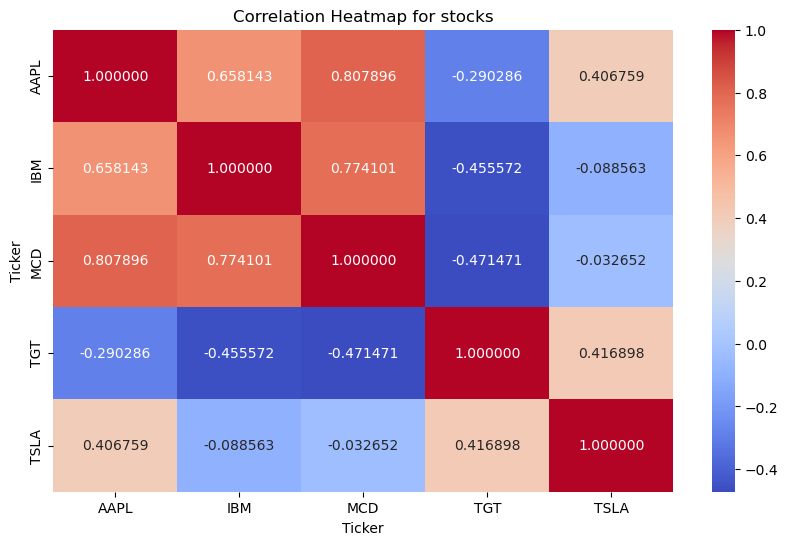

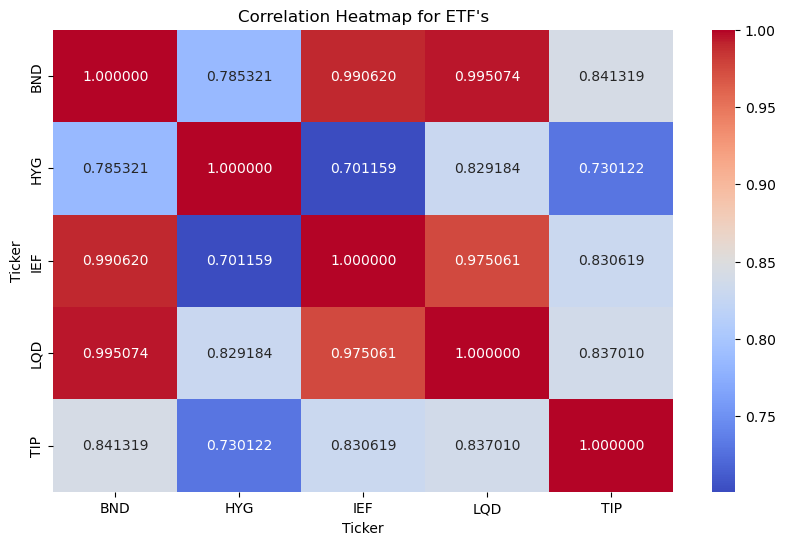

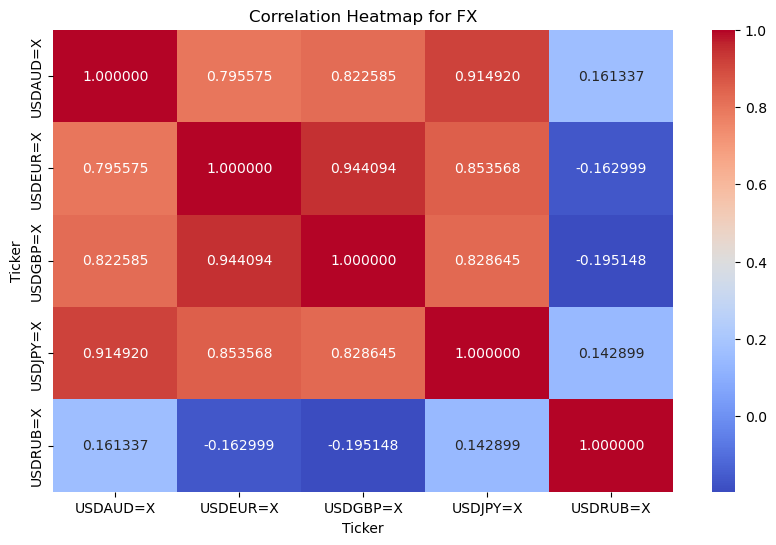

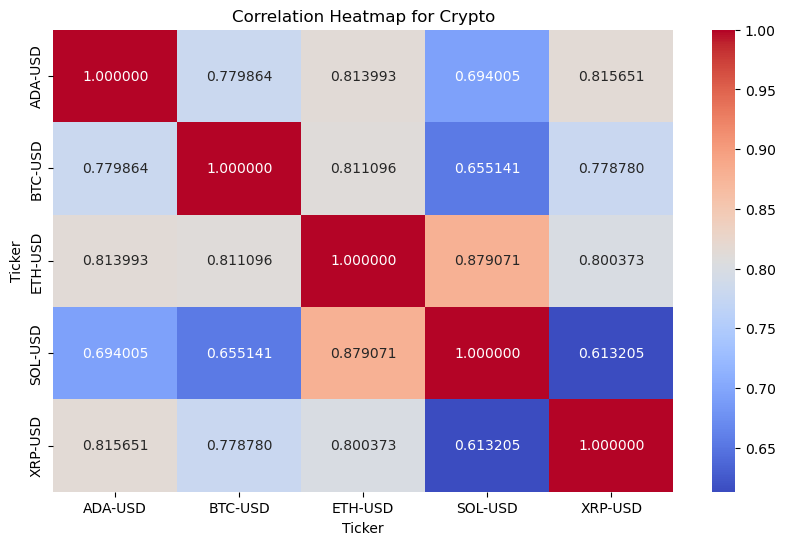

In [2]:
def correlation_heatmap(assets):
    for model_name, model in zip(["stocks","ETF's","FX","Crypto"],assets):
        plt.figure(figsize=(10,6))
        sns.heatmap(model.corr(), fmt="f", annot=True, cmap="coolwarm")
        plt.title(f'Correlation Heatmap for {model_name}')
        plt.show()
        

correlation_heatmap(assets)

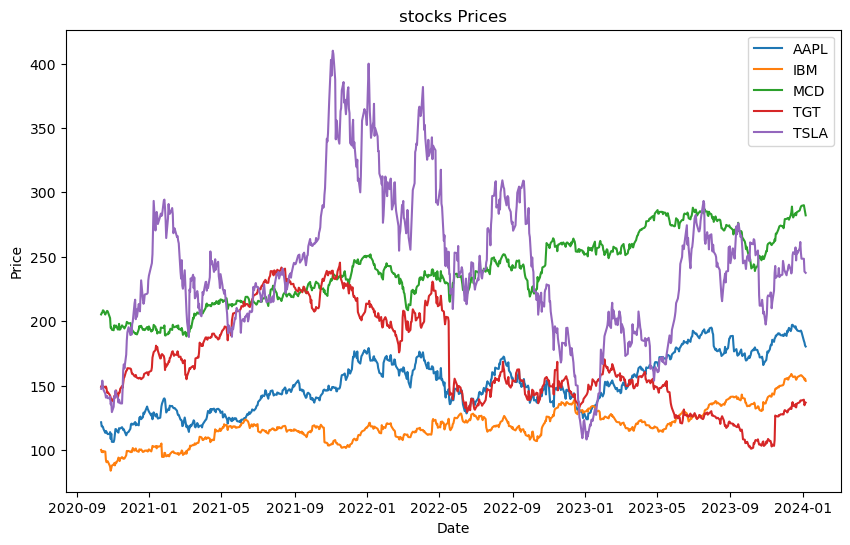

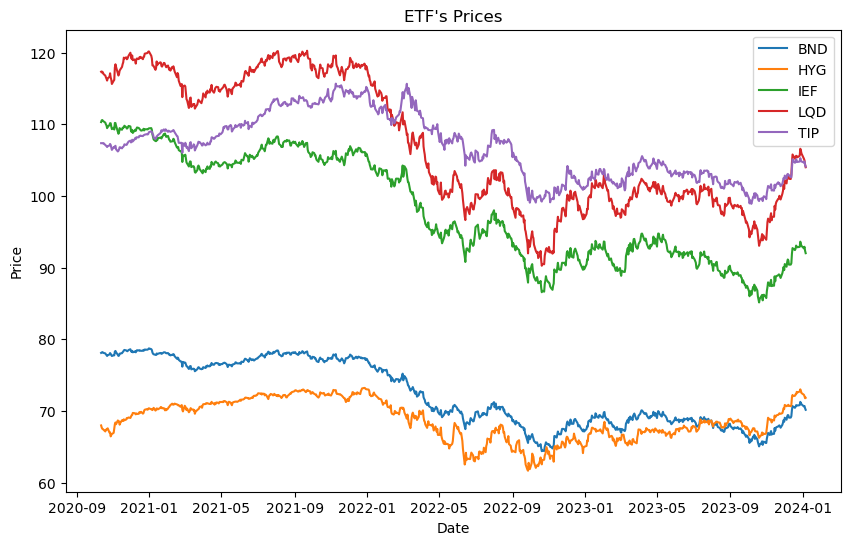

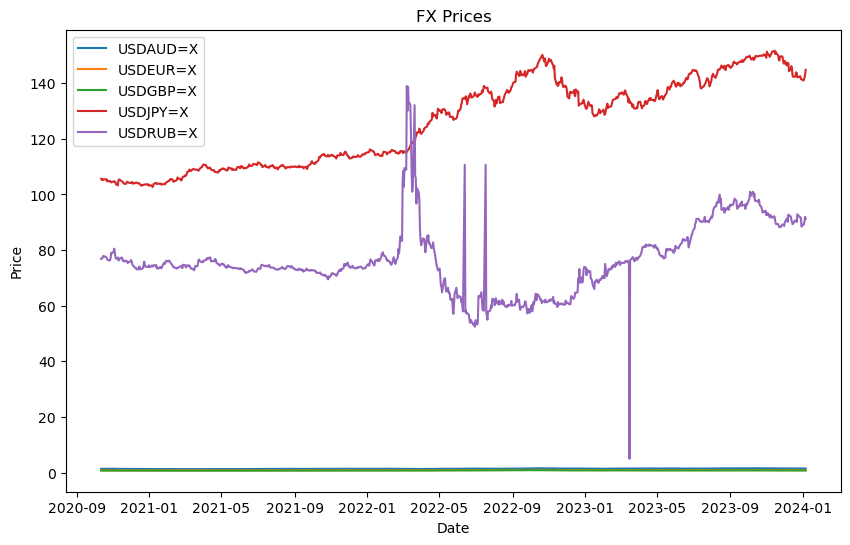

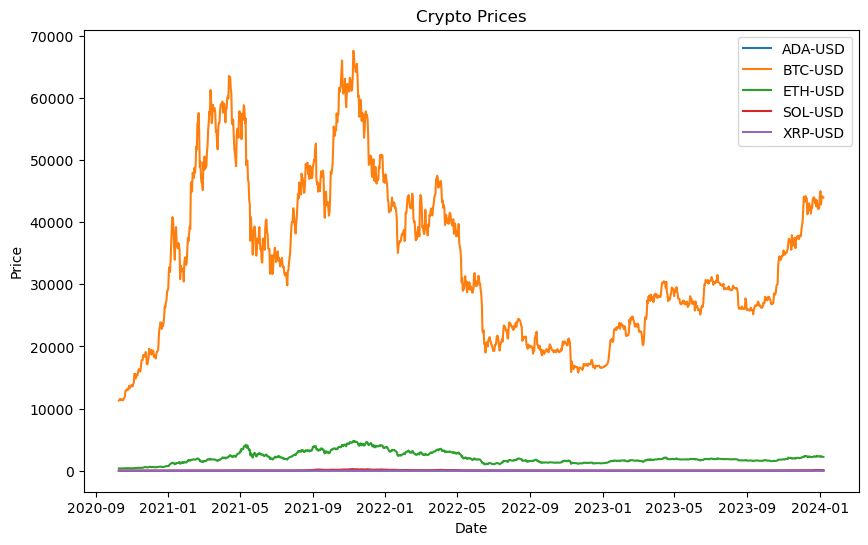

In [3]:
def plot_assets(assets):
    for model_name, model in zip(["stocks","ETF's","FX","Crypto"], assets):
        plt.figure(figsize=(10,6))
        plt.plot(model)
        plt.title(f'{model_name} Prices')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend(model.columns)
        plt.show()


plot_assets(assets)

In [4]:
def portfolio_optimization(assets):
    for model_name, model in zip(["stocks","ETF's","FX","Crypto"], assets):
        mu = expected_returns.mean_historical_return(model)
        risk = risk_models.sample_cov(model)
        ef = EfficientFrontier(mu, risk)
        weights = ef.max_sharpe()
        sharpe_ratio = ef.portfolio_performance()[2]
        ### optimal portfolio performance
        
        optimal_expected_returns = ef.portfolio_performance()[0]
        optimal_portfolio_risk = ef.portfolio_performance()[1]
        optimal_sharpe_ratio = (optimal_expected_returns - risk_free_rate) / optimal_portfolio_risk
        print(f'Expected returns of {model_name}: {mu}')
        print(f'Risk (Covariance Matrix) of {model_name}: {risk}')
        print(f'Optimized weights for {model_name}: {weights}')
        print(f'{model_name}; --Sharpe Ratio-- {sharpe_ratio}')
        print(f'Optimal Expected Returns on {model_name}: {optimal_expected_returns}')
        print(f'Risk of Optimal Portfolio {model_name}: {optimal_portfolio_risk}')
        print(f'Sharpe Ratio of optimal Portfolio {model_name}: {optimal_sharpe_ratio}')

        
    return model

portfolio_optimization(assets)

Expected returns of stocks: Ticker
AAPL    0.130323
IBM     0.142364
MCD     0.103751
TGT    -0.026247
TSLA    0.159252
dtype: float64
Risk (Covariance Matrix) of stocks: Ticker      AAPL       IBM       MCD       TGT      TSLA
Ticker                                                  
AAPL    0.079114  0.015844  0.019041  0.032963  0.084533
IBM     0.015844  0.046903  0.012046  0.019776  0.012333
MCD     0.019041  0.012046  0.027502  0.015987  0.017875
TGT     0.032963  0.019776  0.015987  0.115830  0.056130
TSLA    0.084533  0.012333  0.017875  0.056130  0.345598
Optimized weights for stocks: OrderedDict([('AAPL', 0.0917449761376246), ('IBM', 0.4265057235537626), ('MCD', 0.4546620694618919), ('TGT', 0.0), ('TSLA', 0.0270872308467212)])
stocks; --Sharpe Ratio-- 0.8051124472367783
Optimal Expected Returns on stocks: 0.12416063369597688
Risk of Optimal Portfolio stocks: 0.15421527032914203
Sharpe Ratio of optimal Portfolio stocks: 0.48089033944365983
Expected returns of ETF's: Ticker
BND 

Ticker,ADA-USD,BTC-USD,ETH-USD,SOL-USD,XRP-USD
Date,,,,,
2020-10-10,0.105025,11296.361328,370.967590,2.406090,0.254290
2020-10-11,0.106538,11384.181641,375.142059,2.426578,0.255719
2020-10-12,0.110034,11555.363281,387.731262,2.587072,0.256446
2020-10-13,0.108852,11425.899414,381.190765,2.404910,0.256323
2020-10-14,0.107297,11429.506836,379.484039,2.314635,0.249448
...,...,...,...,...,...
2024-01-03,0.557286,42848.175781,2210.761963,98.594437,0.582580
2024-01-04,0.570567,44179.921875,2269.038086,105.077538,0.588226
2024-01-05,0.541242,44162.691406,2268.647217,99.978790,0.576486


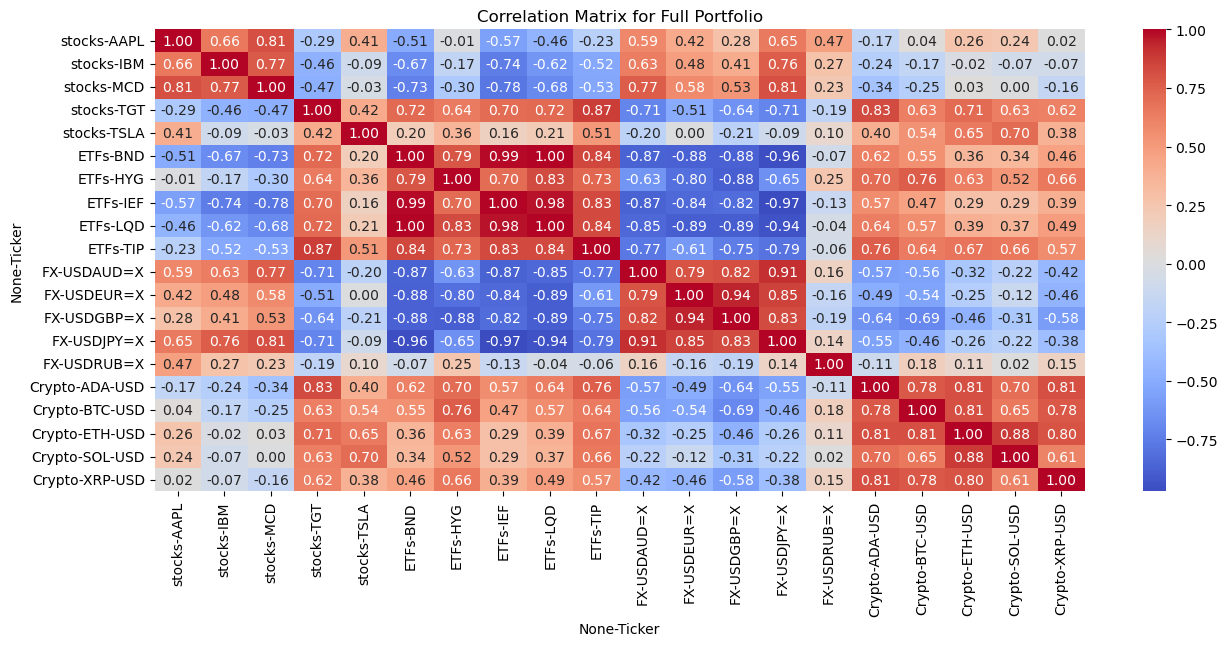

In [5]:
df = pd.concat(assets,axis=1,keys=["stocks","ETFs","FX","Crypto"])
df.dropna(inplace=True)



def full_portfolio_heatmap(df):
    plt.figure(figsize=(15,6))
    sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap="coolwarm")
    plt.title('Correlation Matrix for Full Portfolio')
    plt.show()
    

full_portfolio_heatmap(df)

In [6]:
def full_portfolio_performance(df, risk_free_rate=0.05):
    mu = expected_returns.mean_historical_return(df)
    risk = risk_models.sample_cov(df)
    ef = EfficientFrontier(mu, risk)
    weights = ef.max_sharpe()
    portfolio_return, portfolio_volatility, sharpe_ratio = ef.portfolio_performance()
    optimal_expected_returns = portfolio_return
    optimal_portfolio_risk = portfolio_volatility
    optimal_sharpe_ratio = (optimal_expected_returns - risk_free_rate) / optimal_portfolio_risk

    """ Using Greedy Investor for how much money you receive back"""
    
    latest_prices = get_latest_prices(df)
    print(latest_prices)
    da = DiscreteAllocation(weights, latest_prices,total_portfolio_value=1000000)
    print(f'Optimized weights for the full portfolio: {weights}')
    print(f'Expected return of the full portfolio: {optimal_expected_returns}')
    print(f'Risk of the full portfolio: {optimal_portfolio_risk}')
    print(f'Sharpe ratio of the full portfolio: {optimal_sharpe_ratio}')
    allocation, leftover = da.greedy_portfolio()
    print('Discrete Allocation: ',allocation)
    print('Left over cash',leftover)



    return weights, optimal_expected_returns, optimal_portfolio_risk, optimal_sharpe_ratio,da,allocation,leftover



full_portfolio_performance(df,risk_free_rate)

        Ticker  
stocks  AAPL          180.296692
        IBM           153.607117
        MCD           282.152435
        TGT           136.694702
        TSLA          237.490005
ETFs    BND            70.157799
        HYG            71.832199
        IEF            92.016930
        LQD           104.016243
        TIP           104.116013
FX      USDAUD=X        1.491070
        USDEUR=X        0.913460
        USDGBP=X        0.788390
        USDJPY=X      144.764999
        USDRUB=X       91.315002
Crypto  ADA-USD         0.541242
        BTC-USD     44162.691406
        ETH-USD      2268.647217
        SOL-USD        99.978790
        XRP-USD         0.576486
Name: 2024-01-05 00:00:00, dtype: float64
Optimized weights for the full portfolio: OrderedDict([(('stocks', 'AAPL'), 0.0), (('stocks', 'IBM'), 0.1144001016004318), (('stocks', 'MCD'), 0.0999302398561356), (('stocks', 'TGT'), 0.0), (('stocks', 'TSLA'), 0.0), (('ETFs', 'BND'), 0.0), (('ETFs', 'HYG'), 0.0), (('ETFs', 'IEF')

(OrderedDict([(('stocks', 'AAPL'), 0.0),
              (('stocks', 'IBM'), 0.1144001016004318),
              (('stocks', 'MCD'), 0.0999302398561356),
              (('stocks', 'TGT'), 0.0),
              (('stocks', 'TSLA'), 0.0),
              (('ETFs', 'BND'), 0.0),
              (('ETFs', 'HYG'), 0.0),
              (('ETFs', 'IEF'), 0.0),
              (('ETFs', 'LQD'), 0.0),
              (('ETFs', 'TIP'), 0.0),
              (('FX', 'USDAUD=X'), 0.0),
              (('FX', 'USDEUR=X'), 0.0),
              (('FX', 'USDGBP=X'), 0.0),
              (('FX', 'USDJPY=X'), 0.7177209355884763),
              (('FX', 'USDRUB=X'), 0.0),
              (('Crypto', 'ADA-USD'), 0.0),
              (('Crypto', 'BTC-USD'), 0.0),
              (('Crypto', 'ETH-USD'), 0.0),
              (('Crypto', 'SOL-USD'), 0.0679487229549566),
              (('Crypto', 'XRP-USD'), 0.0)]),
 0.24327755101955587,
 0.1184745504181656,
 1.6313845491488843,
 {('FX', 'USDJPY=X'): 4957,
  ('stocks', 'IBM'): 745,
  (

In [7]:
stock_ticker = ['AAPL','IBM','^GSPC','TSLA','DIS','MCD','GOOGL']


df = yf.download(tickers=stock_ticker,start=start_date,end=end_date)['Close']
df.head(10)

print(df.pct_change().dropna())

[*********************100%***********************]  7 of 7 completed

Ticker          AAPL       DIS     GOOGL       IBM       MCD      TSLA  \
Date                                                                     
2020-10-13 -0.026527  0.031928  0.001585 -0.016587  0.005484  0.009835   
2020-10-14  0.000743 -0.018378 -0.002316  0.006715  0.001188  0.032800   
2020-10-15 -0.003961  0.006083 -0.005098 -0.008337  0.008874 -0.026924   
2020-10-16 -0.014001 -0.004318  0.007863  0.008327 -0.001176 -0.020518   
2020-10-19 -0.025542 -0.020345 -0.024080 -0.003256 -0.014692 -0.020106   
...              ...       ...       ...       ...       ...       ...   
2023-12-29 -0.005424 -0.001217 -0.003851 -0.001221  0.002265 -0.018564   
2024-01-02 -0.035787  0.004652 -0.010881 -0.012534  0.001787 -0.000241   
2024-01-03 -0.007488  0.010363  0.005428 -0.008669 -0.008921 -0.040134   
2024-01-04 -0.012700 -0.011893 -0.018212  0.004747 -0.009002 -0.002181   
2024-01-05 -0.004013  0.003754 -0.004839 -0.010568 -0.009426 -0.001849   

Ticker         ^GSPC  
Date          

single index for each stock ticker                  AAPL  Excess_Return
Date                                 
2020-10-12  121.435654     121.385654
2020-10-13  118.214287     118.164287
2020-10-14  118.302139     118.252139
2020-10-15  117.833580     117.783580
2020-10-16  116.183830     116.133830
...                ...            ...
2023-12-29  191.591385     191.541385
2024-01-02  184.734970     184.684970
2024-01-03  183.351746     183.301746
2024-01-04  181.023178     180.973178
2024-01-05  180.296692     180.246692

[814 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     820.8
Date:                Wed, 08 Jan 2025   Prob (F-statistic):          2.64e-125
Time:                        21:01:35   Log-Likelihoo

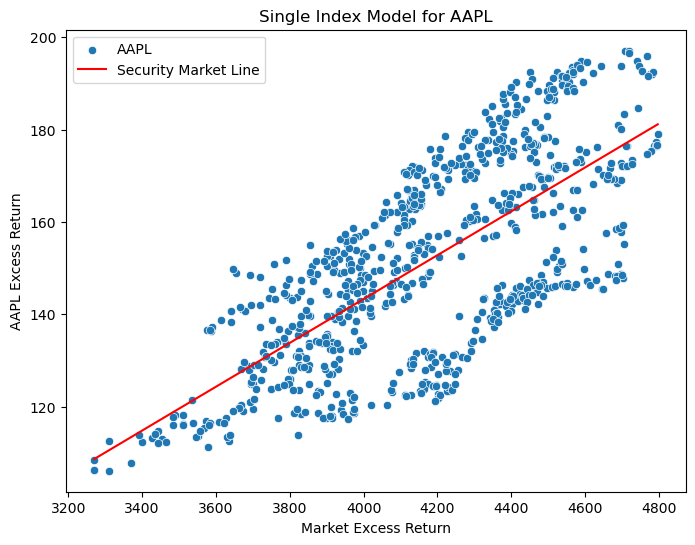

single index for each stock ticker                   IBM  Excess_Return
Date                                 
2020-10-12   99.982361      99.932361
2020-10-13   98.323975      98.273975
2020-10-14   98.984177      98.934177
2020-10-15   98.158920      98.108920
2020-10-16   98.976326      98.926326
...                ...            ...
2023-12-29  157.843948     157.793948
2024-01-02  155.865463     155.815463
2024-01-03  154.514328     154.464328
2024-01-04  155.247803     155.197803
2024-01-05  153.607117     153.557117

[814 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     205.0
Date:                Wed, 08 Jan 2025   Prob (F-statistic):           1.25e-41
Time:                        21:01:36   Log-Likelihoo

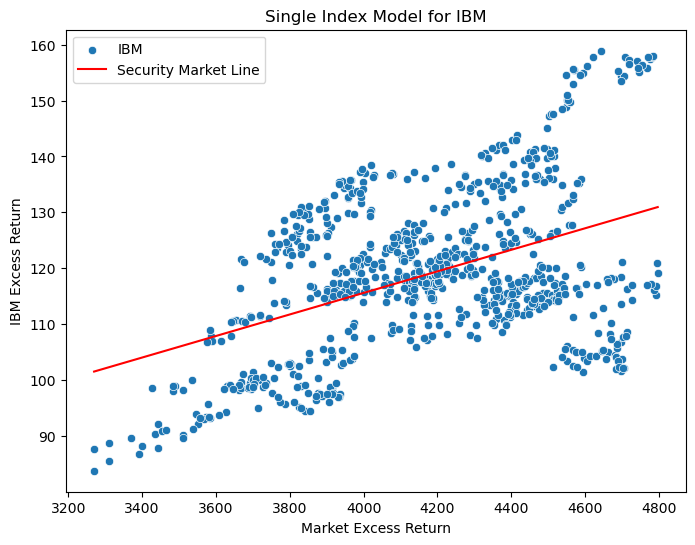

single index for each stock ticker                   MCD  Excess_Return
Date                                 
2020-10-12  205.198273     205.148273
2020-10-13  206.323593     206.273593
2020-10-14  206.568649     206.518649
2020-10-15  208.401779     208.351779
2020-10-16  208.156754     208.106754
...                ...            ...
2023-12-29  289.494537     289.444537
2024-01-02  290.011963     289.961963
2024-01-03  287.424713     287.374713
2024-01-04  284.837402     284.787402
2024-01-05  282.152435     282.102435

[814 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     199.3
Date:                Wed, 08 Jan 2025   Prob (F-statistic):           1.24e-40
Time:                        21:01:36   Log-Likelihoo

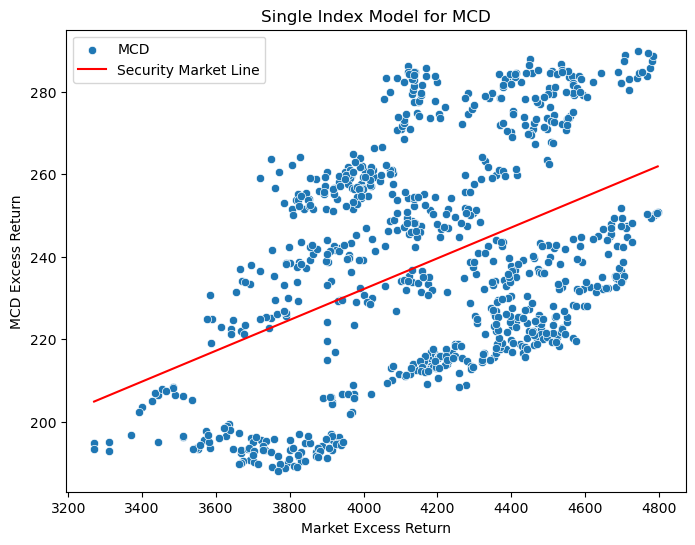

single index for each stock ticker                  TSLA  Excess_Return
Date                                 
2020-10-12  147.433334     147.383334
2020-10-13  148.883331     148.833331
2020-10-14  153.766663     153.716663
2020-10-15  149.626663     149.576663
2020-10-16  146.556671     146.506671
...                ...            ...
2023-12-29  248.479996     248.429996
2024-01-02  248.419998     248.369998
2024-01-03  238.449997     238.399997
2024-01-04  237.929993     237.879993
2024-01-05  237.490005     237.440005

[814 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     465.8
Date:                Wed, 08 Jan 2025   Prob (F-statistic):           5.20e-82
Time:                        21:01:36   Log-Likelihoo

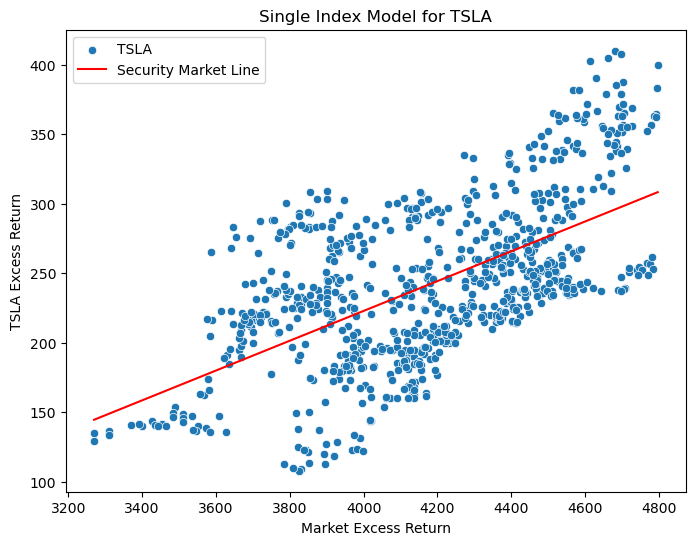

single index for each stock ticker                   DIS  Excess_Return
Date                                 
2020-10-12  123.445007     123.395007
2020-10-13  127.386322     127.336322
2020-10-14  125.045235     124.995235
2020-10-15  125.805840     125.755840
2020-10-16  125.262550     125.212550
...                ...            ...
2023-12-29   89.478874      89.428874
2024-01-02   89.895103      89.845103
2024-01-03   90.826660      90.776660
2024-01-04   89.746445      89.696445
2024-01-05   90.083397      90.033397

[814 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.093
Date:                Wed, 08 Jan 2025   Prob (F-statistic):              0.148
Time:                        21:01:37   Log-Likelihoo

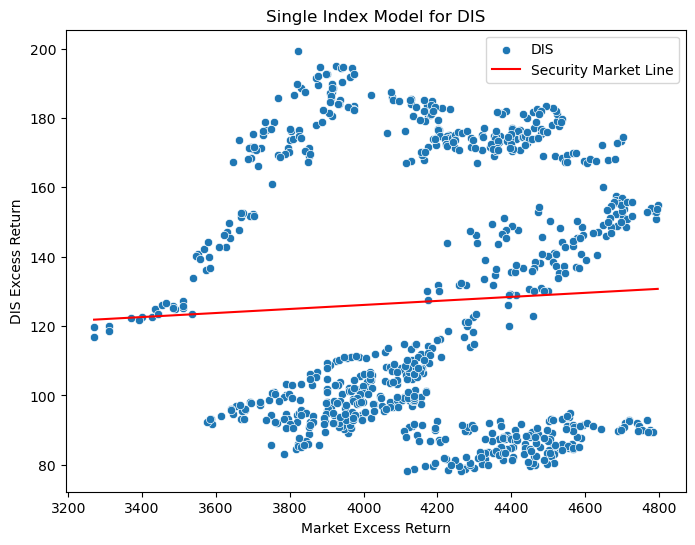

single index for each stock ticker                  AAPL  Excess_Return
Date                                 
2020-10-12  121.435654     121.385654
2020-10-13  118.214287     118.164287
2020-10-14  118.302139     118.252139
2020-10-15  117.833580     117.783580
2020-10-16  116.183830     116.133830
...                ...            ...
2023-12-29  191.591385     191.541385
2024-01-02  184.734970     184.684970
2024-01-03  183.351746     183.301746
2024-01-04  181.023178     180.973178
2024-01-05  180.296692     180.246692

[814 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     820.8
Date:                Wed, 08 Jan 2025   Prob (F-statistic):          2.64e-125
Time:                        21:01:37   Log-Likelihoo

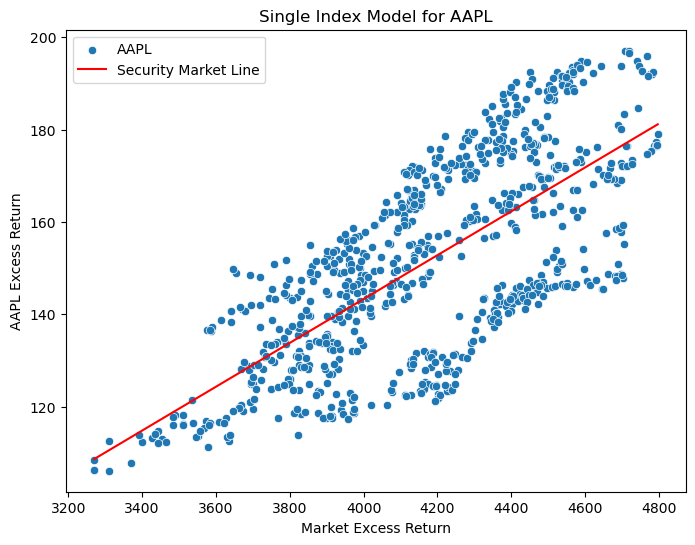

In [8]:
def single_index_model(stock_ticker, sp500, risk_free_rate):
    stock_data = df[stock_ticker].to_frame()
    sp500_data = df[sp500].to_frame()
    stock_data['Excess_Return'] = stock_data[stock_ticker] - risk_free_rate
    sp500_data['Excess_Return'] = sp500_data['^GSPC'] - risk_free_rate
    model = sm.OLS(endog=stock_data['Excess_Return'], exog=sm.add_constant(sp500_data['Excess_Return'])).fit()
    print(f'single index for each stock ticker{stock_data}')
    print(model.summary())
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=sp500_data['Excess_Return'], y=stock_data['Excess_Return'], label=stock_ticker)
    sns.lineplot(x=sp500_data['Excess_Return'], y=model.fittedvalues, color='red', label='Security Market Line')
    plt.title(f'Single Index Model for {stock_ticker}')
    plt.xlabel('Market Excess Return')
    plt.ylabel(f'{stock_ticker} Excess Return')
    plt.legend()
    plt.show()



single_index_model("AAPL","^GSPC",risk_free_rate)
single_index_model("IBM","^GSPC",risk_free_rate)
single_index_model("MCD","^GSPC",risk_free_rate)
single_index_model("TSLA",'^GSPC',risk_free_rate)
single_index_model("DIS","^GSPC",risk_free_rate)
single_index_model("AAPL","^GSPC", risk_free_rate)

[*********************100%***********************]  5 of 5 completed


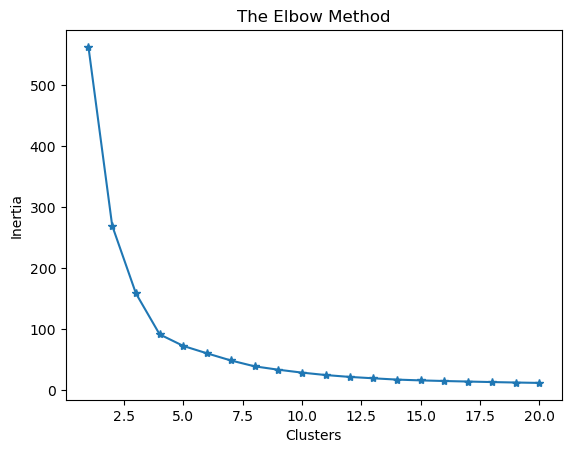

In [12]:
df = yf.download(stock_tickers,start=start_date,end=end_date)
df.head(10)



from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

X = df[['Open','Close','High','Volume']]
X_scaled = MinMaxScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

cc = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i,init='k-means++',n_init=20,random_state=42).fit(X_pca)
    cc.append(kmeans.inertia_)



### The Elbow Method
plt.plot(range(1,21),cc,marker='*')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

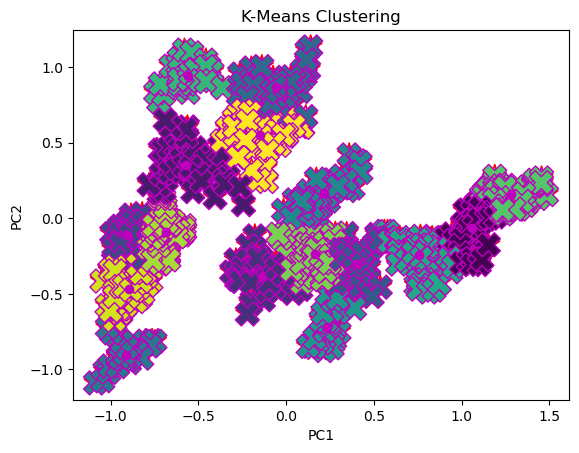

In [13]:
kmeans = KMeans(n_clusters=16,init='k-means++',n_init=20,random_state=42).fit(X_pca)
labels = kmeans.fit_predict(X_pca)
X['Cluster 1'] = labels
X['Cluster 2'] = labels


plt.scatter(X_pca[:,0],X_pca[:,1],c=X['Cluster 1'],s=300,marker='*',edgecolors='r')
plt.scatter(X_pca[:,0],X_pca[:,1],c=X['Cluster 2'],s=300,marker='X',edgecolors='m')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='o',color='m')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering')
plt.show()

In [14]:

from sklearn.metrics import silhouette_score
lables = kmeans.fit_predict(X_pca)
X['Cluster'] = labels
sh = silhouette_score(X_pca, labels)
print(f'The silhoutte score is {sh*100:.2f}%')
print(kmeans.inertia_)


The silhoutte score is 47.56%
14.716673852964867
